In [1]:
import pandas as pd
from os.path import join as opj
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from fg_shared import _fg_data

In [23]:
route_fn = opj(_fg_data, 'SEATRAC/TB_hackday_2023/data/liu_etal/GSE218157_bcg_routecohort_processed.txt.gz')
dose_fn = opj(_fg_data, 'SEATRAC/TB_hackday_2023/data/liu_etal/GSE218270_ivbcg_dosecohort_processed.txt.gz')

route_meta_fn = opj(_fg_data, 'SEATRAC/TB_hackday_2023/data/liu_etal/GSE218157_family.soft.csv')
dose_meta_fn = opj(_fg_data, 'SEATRAC/TB_hackday_2023/data/liu_etal/GSE218270_family.soft.csv')

route = pd.read_csv(route_fn, sep='\t')
dose = pd.read_csv(dose_fn, sep='\t')

route_meta = pd.read_csv(route_meta_fn)
dose_meta = pd.read_csv(dose_meta_fn)

In [9]:
route.head()

,Unnamed: 0,0NR_65,0NR_66,0NR_67,0NR_68,0TL_113,0TL_114,0TL_115,0TL_116,CZRJR_57,...,OMI_71,OMI_72,ONF_61,ONF_62,ONF_63,ONF_64,OTM_33,OTM_34,OTM_35,OTM_36
0,ENSMMUG00000000001,6.018247,6.490520,6.934363,6.406639,6.395507,6.277460,6.477014,3.521936,6.206744,...,6.223251,6.315969,6.150223,6.060638,6.170294,6.029659,6.202571,6.143957,6.158573,5.969481
1,ENSMMUG00000000002,4.821792,5.169552,5.234211,4.699013,4.541773,4.388108,4.356595,3.521936,4.455503,...,4.547387,4.264942,4.051655,4.257938,4.486982,4.414767,4.726354,4.467178,4.577905,4.429687
2,ENSMMUG00000000005,7.486099,8.096151,7.795571,7.816506,7.906983,7.981501,7.857482,8.499467,8.497526,...,8.547556,8.075179,7.529688,7.667043,7.667770,7.923648,8.081003,8.478225,8.438682,8.501435
3,ENSMMUG00000000006,5.344205,5.283571,4.900683,5.257814,5.222457,5.184818,5.164171,3.521936,4.994231,...,4.906238,5.229088,5.327725,4.468867,5.211178,5.349143,5.283288,5.049585,5.195941,4.973442
4,ENSMMUG00000000007,6.308265,6.345711,6.545079,6.393367,6.243936,6.625991,6.710794,4.450929,7.170021,...,5.903146,6.491603,7.191859,6.977857,7.183162,7.424881,6.306230,6.266535,6.621594,6.411135


In [33]:
route_meta.head()

,Unnamed: 0,title,geo_accession,source_name,organism,taxid,tissue,animal_id,pitt_id,vax_group,vax_dose,dose_group,time_after_bcg,total_mtb_cfu,log_mtb_cfu,grans_nx,protect_outcome,description
0,0,0NR IV pre,GSM6735570,Whole Blood,Macaca mulatta,9544,Whole Blood,0NR,13417,IV,3.70E+07,high,pre,30.0,1.491,1,protected,0NR_65
1,1,0NR IV d2,GSM6735571,Whole Blood,Macaca mulatta,9544,Whole Blood,0NR,13417,IV,3.70E+07,high,d2,30.0,1.491,1,protected,0NR_66
2,2,0NR IV wk2,GSM6735572,Whole Blood,Macaca mulatta,9544,Whole Blood,0NR,13417,IV,3.70E+07,high,wk2,30.0,1.491,1,protected,0NR_67
3,3,0NR IV wk12,GSM6735573,Whole Blood,Macaca mulatta,9544,Whole Blood,0NR,13417,IV,3.70E+07,high,wk12,30.0,1.491,1,protected,0NR_68
4,4,0TL HD-ID pre,GSM6735574,Whole Blood,Macaca mulatta,9544,Whole Blood,0TL,18117,HD-ID,2.90E+07,high,pre,2120.0,3.327,6,not_protected,0TL_113


In [27]:
print('Missing IDs in route cohort: ', [c for c in route.columns if not c in route_meta['description'].values])
print('Missing IDs in dose cohort: ', [c for c in dose.columns if not c in dose_meta['description'].values])

Missing IDs in route cohort:  ['Unnamed: 0']
Missing IDs in dose cohort:  ['Unnamed: 0']


In [28]:
mmulatta_genes_fn = opj(_fg_data, 'SEATRAC/TB_hackday_2023/seatrac-hackday-2023/mmulatta_to_human.tsv')
mmulatta = pd.read_csv(mmulatta_genes_fn, sep='\t')
mmulatta.head()

,Gene stable ID,Gene name,Human gene stable ID,Human gene name,Human Whole-genome alignment coverage,"Human orthology confidence [0 low, 1 high]"
0,ENSMMUG00000023296,NaN,ENSG00000185220,PGBD2,100.0,1.0
1,ENSMMUG00000036181,U6,ENSG00000200495,RNU6-1205P,100.0,1.0
2,ENSMMUG00000000634,ZNF692,ENSG00000171163,ZNF692,100.0,1.0
3,ENSMMUG00000037875,ZNF672,ENSG00000171161,ZNF672,100.0,1.0
4,ENSMMUG00000000632,SH3BP5L,ENSG00000175137,SH3BP5L,100.0,1.0


In [35]:
route_ids = route.columns[1:]
route_cts = pd.merge(route.rename({'Unnamed: 0': 'geneid'}, axis=1).set_index('geneid').stack().reset_index(),
                     mmulatta.rename({'Gene stable ID':'geneid'}, axis=1),
                     on='geneid', how='left')
route_cts = route_cts.rename({'level_1':'sampleid',
                              0:'ncounts'}, axis=1)
route_cts = pd.merge(route_cts, route_meta.rename({'description':'sampleid'}, axis=1), on='sampleid', how='left')
route_cts.head()

,geneid,sampleid,ncounts,Gene name,Human gene stable ID,Human gene name,Human Whole-genome alignment coverage,"Human orthology confidence [0 low, 1 high]",Unnamed: 0,title,...,animal_id,pitt_id,vax_group,vax_dose,dose_group,time_after_bcg,total_mtb_cfu,log_mtb_cfu,grans_nx,protect_outcome
0,ENSMMUG00000000001,0NR_65,6.018247,CCNF,ENSG00000162063,CCNF,100.0,1.0,0,0NR IV pre,...,0NR,13417,IV,3.70E+07,high,pre,30.0,1.491,1,protected
1,ENSMMUG00000000001,0NR_66,6.490520,CCNF,ENSG00000162063,CCNF,100.0,1.0,1,0NR IV d2,...,0NR,13417,IV,3.70E+07,high,d2,30.0,1.491,1,protected
2,ENSMMUG00000000001,0NR_67,6.934363,CCNF,ENSG00000162063,CCNF,100.0,1.0,2,0NR IV wk2,...,0NR,13417,IV,3.70E+07,high,wk2,30.0,1.491,1,protected
3,ENSMMUG00000000001,0NR_68,6.406639,CCNF,ENSG00000162063,CCNF,100.0,1.0,3,0NR IV wk12,...,0NR,13417,IV,3.70E+07,high,wk12,30.0,1.491,1,protected
4,ENSMMUG00000000001,0TL_113,6.395507,CCNF,ENSG00000162063,CCNF,100.0,1.0,4,0TL HD-ID pre,...,0TL,18117,HD-ID,2.90E+07,high,pre,2120.0,3.327,6,not_protected


In [36]:
dose_ids = dose.columns[1:]
dose_cts = pd.merge(dose.rename({'Unnamed: 0': 'geneid'}, axis=1).set_index('geneid').stack().reset_index(),
                     mmulatta.rename({'Gene stable ID':'geneid'}, axis=1),
                     on='geneid', how='left')
dose_cts = dose_cts.rename({'level_1':'sampleid',
                              0:'ncounts'}, axis=1)
dose_cts = pd.merge(dose_cts, dose_meta.rename({'description':'sampleid'}, axis=1), on='sampleid', how='left')
dose_cts.head()

,geneid,sampleid,ncounts,Gene name,Human gene stable ID,Human gene name,Human Whole-genome alignment coverage,"Human orthology confidence [0 low, 1 high]",Unnamed: 0,title,...,subjid,pitt_id,bcg_dose_log10,dose_group,timeafterbcg,total_mtb_cfu,log_mtb_cfu,grans_nx,log_grans_nx,protect_outcome
0,ENSMMUG00000000001,13N022_d2Pre,7.182459,CCNF,ENSG00000162063,CCNF,100.0,1.0,1,13N022 high dose IV BCG d2,...,13N022,3218,6.39,high,d2,0.0,0.0,0,0.0,protected
1,ENSMMUG00000000001,13N022_wk12Pre,7.742391,CCNF,ENSG00000162063,CCNF,100.0,1.0,4,13N022 high dose IV BCG wk12,...,13N022,3218,6.39,high,wk12,0.0,0.0,0,0.0,protected
2,ENSMMUG00000000001,13N022_wk2Pre,7.432432,CCNF,ENSG00000162063,CCNF,100.0,1.0,2,13N022 high dose IV BCG wk2,...,13N022,3218,6.39,high,wk2,0.0,0.0,0,0.0,protected
3,ENSMMUG00000000001,13N022_wk4Pre,7.379809,CCNF,ENSG00000162063,CCNF,100.0,1.0,3,13N022 high dose IV BCG wk4,...,13N022,3218,6.39,high,wk4,0.0,0.0,0,0.0,protected
4,ENSMMUG00000000001,13N022_wkm4Pre,7.379290,CCNF,ENSG00000162063,CCNF,100.0,1.0,0,13N022 high dose IV BCG pre,...,13N022,3218,6.39,high,pre,0.0,0.0,0,0.0,protected


<AxesSubplot:xlabel='vax_group', ylabel='ncounts'>

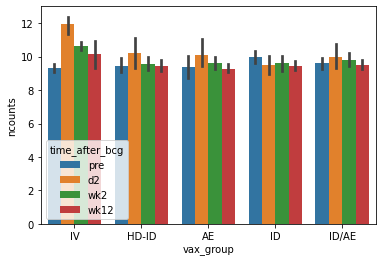

In [50]:
sns.barplot(x='vax_group', y='ncounts', hue='time_after_bcg', data=route_cts.loc[route_cts['Gene name'] == 'OAS3'])

<AxesSubplot:xlabel='vax_group', ylabel='ncounts'>

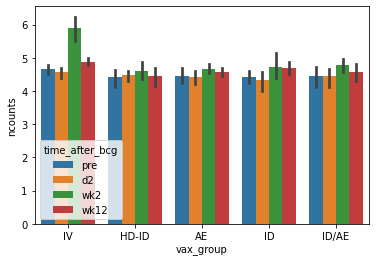

In [51]:
sns.barplot(x='vax_group', y='ncounts', hue='time_after_bcg', data=route_cts.loc[route_cts['Gene name'] == 'IFNG'])

<AxesSubplot:xlabel='dose_group', ylabel='ncounts'>

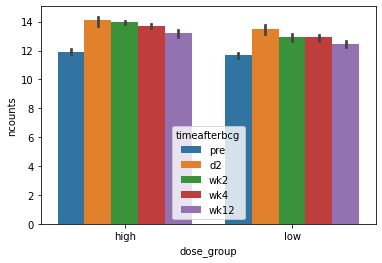

In [52]:
sns.barplot(x='dose_group', y='ncounts', hue='timeafterbcg', data=dose_cts.loc[dose_cts['Gene name'] == 'STAT1'], hue_order=['pre', 'd2', 'wk2', 'wk4', 'wk12'])